# Importing Modules

In [42]:
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import normalize

# Reading Images

In [43]:
def read_images(folder_path):
    images = []
    for img_path in sorted(glob.glob(folder_path + "/*.pgm")):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)
    return images

# Pre-processing

In [44]:
def upscale_image(image):
    upscaled_images = []
    for img in image:
        upscaled_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        upscaled_images.append(upscaled_img)
    return upscaled_images

def clahe_image(image, clip_limit=3, tile_size=(2,2)):
    clahe_images = []
    for img in image:
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
        clahe_img = clahe.apply(img)
        clahe_images.append(clahe_img)
    return clahe_images

def histogram_equalization(images):
    he_images = []
    for img in images:
        hist_eq = cv2.equalizeHist(img)
        he_images.append(hist_eq)
    return he_images

def smoothen_image(images):
    smooth_images = []
    for img in images:
        smooth = cv2.GaussianBlur(img, (3, 3), 0)
        smooth_images.append(smooth)
    return smooth_images

def upscale_and_hist(images):
    holder = upscale_image(images)
    return histogram_equalization(holder)

def upscale_and_smoothen(images):
    holder = upscale_image(images)
    return smoothen_image(holder)

# Distance Measure

In [45]:
def hamming_distance(image1, image2):
    # Ensure the images are the same shape
    if image1.shape != image2.shape:
        raise ValueError("Images must be the same shape.")
    # Convert the images to 1D arrays
    image1 = np.ravel(image1)
    image2 = np.ravel(image2)
    # Compute the Hamming distance
    hamming_dist = np.sum(image1 != image2)
    return hamming_dist

def normalizedCorrelationCoefficient(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Images must be the same shape.")
    x=image1.reshape((-1,1))
    y=image2.reshape((-1,1))
    xn = x-np.mean(x)
    yn = y-np.mean(y)
    normalized_Correlation_Coefficient = (np.sum(xn * yn)) / (np.sqrt(np.sum(xn**2)) * np.sqrt(np.sum(yn**2)))
    return normalized_Correlation_Coefficient

def mean_squared_error(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Images must be the same shape.")
    mse = np.mean((image1 - image2)**2)
    return mse

def cosine_similarity(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Images must be the same shape.")
    x = image1.reshape((-1, 1))
    y = image2.reshape((-1, 1))
    similarity = (np.sum(x * y)) / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))
    return similarity

def euclidean_distance(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Images must be the same shape.")
    return np.mean(cdist(normalize(image1), normalize(image2), metric='euclidean'))


# Features Binarization

In [46]:
def binarize_images(images, threshold=128):
    binarized_images = []
    for img in images:
        _, binarized_img = cv2.threshold(img, threshold, 1, cv2.THRESH_BINARY)
        binarized_images.append(binarized_img)
    return binarized_images

def otsu_binarize_images(images):
    otsu_binarized_images = []
    for img in images:
        _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        otsu_binarized_images.append(thresh)
    return otsu_binarized_images

def adaptive_thresholding(images, block_size=11, constant=2):
    adaptive_threshold_images = []
    for img in images:
        thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant)
        adaptive_threshold_images.append(thresh)
    return adaptive_threshold_images

def sauvola_binarization(images, window_size=25, k=0.2):
    sauvola_binarize_images = []
    for img in images:
        mean = cv2.blur(img, (window_size, window_size))
        mean_sq = cv2.blur(img**2, (window_size, window_size))
        std = np.sqrt(mean_sq - mean**2)
        # Calculate threshold using Sauvola's formula
        threshold = mean * (1 + k * ((std / 128) - 1))
        # Binarize the image
        thresh = np.zeros_like(img)
        thresh[img > threshold] = 255
        sauvola_binarize_images.append(thresh)
    return sauvola_binarize_images

def apply_laplacian_filter(images):
    filtered_images = []
    for img in images:
        filtered_img = cv2.Laplacian(img, cv2.CV_64F)
        filtered_images.append(filtered_img)
    return filtered_images

def apply_sobel_filter_x(images):
    filtered_images_x = []
    for img in images:
        filtered_img_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        filtered_images_x.append(filtered_img_x)
    return filtered_images_x

def apply_sobel_filter_y(images):
    filtered_images_y = []
    for img in images:
        filtered_img_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        filtered_images_y.append(filtered_img_y)
    return filtered_images_y

def apply_sobel_filter_xy(images):
    filtered_images_xy = []
    for img in images:
        filtered_img_xy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
        filtered_images_xy.append(filtered_img_xy)
    return filtered_images_xy

def apply_canny_edge_detection(images):
    edge_detected_images = []
    for img in images:
        edge_detected_img = cv2.Canny(img, threshold1=100, threshold2=200)
        edge_detected_images.append(edge_detected_img)
    return edge_detected_images

def apply_scharr_filter(images):
    filtered_images = []
    for img in images:
        filtered_img_x = cv2.Scharr(img, ddepth=-1, dx=1, dy=0, scale=1, borderType=cv2.BORDER_DEFAULT)
        filtered_img_y = cv2.Scharr(img, ddepth=-1, dx=0, dy=1, scale=1, borderType=cv2.BORDER_DEFAULT)
        filtered_img = filtered_img_x + filtered_img_y
        filtered_images.append(filtered_img)
    return filtered_images

def apply_prewitt_filter(images):
    filtered_images = []
    for img in images:
        kernel_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
        kernel_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        filtered_img_x = cv2.filter2D(img, -1, kernel_x)
        filtered_img_y = cv2.filter2D(img, -1, kernel_y)
        filtered_img = filtered_img_x + filtered_img_y
        filtered_images.append(filtered_img)
    return filtered_images

def apply_harris_corner_detection(images):
    detected_corner_images = []
    for img in images:
        gray = np.float32(img)
        dst = cv2.cornerHarris(gray, 2, 3, 1.5)
        corner_detected_img = cv2.dilate(dst, None)
        detected_corner_images.append(corner_detected_img)
    return detected_corner_images

def apply_fft_edge_detection(images):
    filtered_images = []
    for img in images:
        ft_image = np.fft.fft2(img)
        centered_ft_image = np.fft.fftshift(ft_image)
        mask = np.zeros((img.shape[0], img.shape[1]))
        #setting filter
        filter_cutoff = 12
        for i in range(int(img.shape[0]/2) - filter_cutoff, int(img.shape[0]/2) + filter_cutoff):
            for j in range(int(img.shape[0]/2) - filter_cutoff, int(img.shape[0]/2) + filter_cutoff):
                mask[i][j] = 1

        #applying the mask to the centered_ft_image
        filtered_image = centered_ft_image * mask

        #turn the image back and save
        #unshift, inverse fft, and abs to get positive intensities
        filtered_images.append(np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_image))))
    return filtered_images

# Score matrix

In [47]:
def create_score_matrix_ham(probe_images, gallery_images):
    num_probes = len(probe_images)
    num_galleries = len(gallery_images)
    score_matrix = np.zeros((num_probes, num_galleries))

    for i, probe_image in enumerate(probe_images):
        for j, gallery_image in enumerate(gallery_images):
            score_matrix[i, j] = hamming_distance(probe_image, gallery_image)
    return score_matrix

def create_score_matrix_NCC(probe_images, gallery_images):
    num_probes = len(probe_images)
    num_galleries = len(gallery_images)
    score_matrix = np.zeros((num_probes, num_galleries))

    for i, probe_image in enumerate(probe_images):
        for j, gallery_image in enumerate(gallery_images):
            score_matrix[i, j] = normalizedCorrelationCoefficient(probe_image, gallery_image)
    return score_matrix

def create_score_matrix_MSE(probe_images, gallery_images):
    num_probes = len(probe_images)
    num_galleries = len(gallery_images)
    score_matrix = np.zeros((num_probes, num_galleries))

    for i, probe_image in enumerate(probe_images):
        for j, gallery_image in enumerate(gallery_images):
            score_matrix[i, j] = mean_squared_error(probe_image, gallery_image)
    return score_matrix

def create_score_matrix_cosine(probe_images, gallery_images):
    num_probes = len(probe_images)
    num_galleries = len(gallery_images)
    score_matrix = np.zeros((num_probes, num_galleries))

    for i, probe_image in enumerate(probe_images):
        for j, gallery_image in enumerate(gallery_images):
            score_matrix[i, j] = cosine_similarity(probe_image, gallery_image)
    return score_matrix

def create_score_matrix_euclidean(probe_images, gallery_images):
    num_probes = len(probe_images)
    num_galleries = len(gallery_images)
    score_matrix = np.zeros((num_probes, num_galleries))

    for i, probe_image in enumerate(probe_images):
        for j, gallery_image in enumerate(gallery_images):
            score_matrix[i, j] = euclidean_distance(probe_image, gallery_image)
    return score_matrix

# Seperating Scores

In [48]:
def separate_genuine_imposter(score_matrix):
    genuine = []
    imposter = []
    
    # get diagonal indices
    diag_indices = np.diag_indices(score_matrix.shape[0])
    
    for i in range(score_matrix.shape[0]):
        for j in range(score_matrix.shape[1]):
            if i == j:
                genuine.append(score_matrix[diag_indices])
            else:
                imposter.append(score_matrix[i, j])
    return genuine, imposter

# Decidability Index

In [49]:
def decidability_index(genuine_scores, imposter_scores):
    genuine_mean = np.mean(genuine_scores)
    imposter_mean = np.mean(imposter_scores)
    genuine_std = np.std(genuine_scores)
    imposter_std = np.std(imposter_scores)
    
    d_prime = (np.sqrt(2) * abs(genuine_mean - imposter_mean)) / np.sqrt(genuine_std**2 + imposter_std**2)
    return d_prime

In [50]:
gallery_folder = "./GallerySet"
probe_folder = "./ProbeSet"

gallery_images = read_images(gallery_folder)
probe_images = read_images(probe_folder)

print("Number of gallery images:", len(gallery_images))
print("Number of probe images:", len(probe_images))

Number of gallery images: 100
Number of probe images: 100


# Upscaling

In [51]:
Upscaled_gallery_images = upscale_image(gallery_images)
Upscaled_probe_images = upscale_image(probe_images)

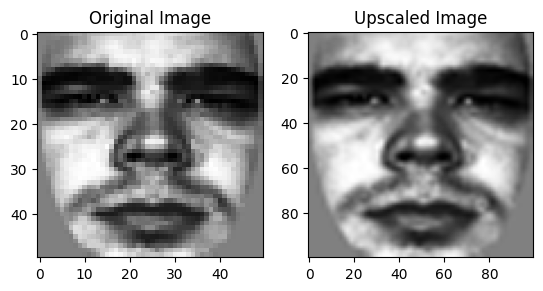

In [52]:
plt.subplot(1, 2, 1)
plt.imshow(gallery_images[0], cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(Upscaled_gallery_images[0], cmap="gray")
plt.title("Upscaled Image")

plt.show()

In [53]:
binarized_gallery_images = sauvola_binarization(Upscaled_gallery_images)
binarized_probe_images = sauvola_binarization(Upscaled_probe_images)

In [54]:
score_matrix_B_NCC = create_score_matrix_NCC(binarized_probe_images, binarized_gallery_images)
score_matrix_B_MSE = create_score_matrix_MSE(binarized_probe_images, binarized_gallery_images)
score_matrix_B_ham = create_score_matrix_ham(binarized_probe_images, binarized_gallery_images)
score_matrix_B_cosine = create_score_matrix_cosine(binarized_probe_images, binarized_gallery_images)
score_matrix_B_euclidean = create_score_matrix_euclidean(binarized_probe_images, binarized_gallery_images)

score_matrix_B_MSE.shape

(100, 100)

In [55]:
score_mat_df = pd.DataFrame(score_matrix_B_NCC[0:9, 0:9])
score_mat_df

,0,1,2,3,4,5,6,7,8
0,0.654687,0.259122,0.378583,0.353821,0.365414,0.333028,0.152603,0.352646,0.269042
1,0.359690,0.824516,0.207787,0.373154,0.262736,0.426114,0.420428,0.418161,0.400307
2,0.468352,0.254346,0.693478,0.409595,0.289511,0.333273,0.185817,0.333842,0.332400
3,0.369596,0.264655,0.319652,0.696390,0.323614,0.377899,0.199518,0.503995,0.346493
4,0.316235,0.244085,0.353759,0.403883,0.814213,0.375174,0.240768,0.404883,0.390936
5,0.376019,0.355940,0.362036,0.440319,0.427642,0.612983,0.287902,0.408406,0.385009
6,0.467938,0.326326,0.340927,0.447144,0.374791,0.388139,0.355684,0.408539,0.241316
7,0.440390,0.338592,0.270543,0.494546,0.384232,0.350031,0.235313,0.715785,0.326049
8,0.278291,0.404118,0.335588,0.461576,0.332815,0.339583,0.199730,0.432713,0.619831


In [56]:
methods = ['NCC', 'MSE', 'hamming', 'cosine similiarity', 'euclidean']
score_matrices = [score_matrix_B_NCC, score_matrix_B_MSE, score_matrix_B_ham, score_matrix_B_cosine, score_matrix_B_euclidean]

for i, method in enumerate(methods):
    genuine, imposter = separate_genuine_imposter(score_matrices[i])
    d_prime = decidability_index(genuine, imposter)
    print("Method {}: Decidability index (d'): {:.4f}".format(method, d_prime))


Method NCC: Decidability index (d'): 3.1132
Method MSE: Decidability index (d'): 3.1367
Method hamming: Decidability index (d'): 3.1367
Method cosine similiarity: Decidability index (d'): 3.1377
Method euclidean: Decidability index (d'): 0.8488


# Hist_eq

In [57]:
he_gallery_images = histogram_equalization(gallery_images)
he_probe_images = histogram_equalization(probe_images)

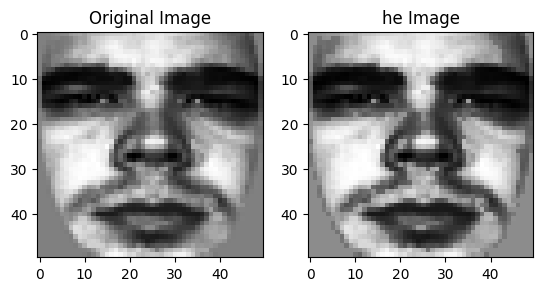

In [58]:
plt.subplot(1, 2, 1)
plt.imshow(gallery_images[0], cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(he_gallery_images[0], cmap="gray")
plt.title("he Image")

plt.show()

In [59]:
binarized_gallery_images = sauvola_binarization(he_gallery_images)
binarized_probe_images = sauvola_binarization(he_probe_images)

In [60]:
score_matrix_B_NCC = create_score_matrix_NCC(binarized_probe_images, binarized_gallery_images)
score_matrix_B_MSE = create_score_matrix_MSE(binarized_probe_images, binarized_gallery_images)
score_matrix_B_ham = create_score_matrix_ham(binarized_probe_images, binarized_gallery_images)
score_matrix_B_cosine = create_score_matrix_cosine(binarized_probe_images, binarized_gallery_images)

score_matrix_B_NCC.shape

(100, 100)

In [61]:
score_mat_df = pd.DataFrame(score_matrix_B_NCC[0:9, 0:9])
score_mat_df

,0,1,2,3,4,5,6,7,8
0,0.691054,0.330426,0.461326,0.384873,0.376784,0.373011,0.240118,0.329721,0.299702
1,0.419366,0.829079,0.341270,0.379851,0.243827,0.503997,0.436665,0.360201,0.416908
2,0.507896,0.379398,0.740403,0.470076,0.353479,0.408280,0.304215,0.346458,0.405888
3,0.451129,0.317930,0.457908,0.723698,0.448065,0.440542,0.251665,0.497758,0.464091
4,0.351161,0.194428,0.358469,0.486433,0.821686,0.327382,0.228091,0.490855,0.395819
5,0.442368,0.378535,0.433277,0.495884,0.438926,0.600586,0.312005,0.379805,0.416451
6,0.535744,0.390341,0.440031,0.487201,0.397131,0.455015,0.414377,0.402908,0.371186
7,0.434274,0.300914,0.326954,0.481981,0.518853,0.323867,0.273090,0.776160,0.318590
8,0.287529,0.377473,0.405275,0.469540,0.311392,0.364289,0.167531,0.336048,0.648072


In [62]:
methods = ['NCC', 'MSE', 'hamming', 'cosine similiarity']
score_matrices = [score_matrix_B_NCC, score_matrix_B_MSE, score_matrix_B_ham, score_matrix_B_cosine]

for i, method in enumerate(methods):
    genuine, imposter = separate_genuine_imposter(score_matrices[i])
    d_prime = decidability_index(genuine, imposter)
    print("Method {}: Decidability index (d'): {:.4f}".format(method, d_prime))


Method NCC: Decidability index (d'): 3.0620
Method MSE: Decidability index (d'): 3.0746
Method hamming: Decidability index (d'): 3.0746
Method cosine similiarity: Decidability index (d'): 3.0882


# Clahe 

In [63]:
Clahe_gallery_images = clahe_image(gallery_images)
Clahe_probe_images = clahe_image(probe_images)

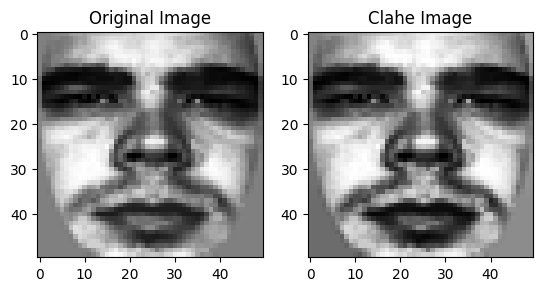

In [64]:
plt.subplot(1, 2, 1)
plt.imshow(gallery_images[0], cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(Clahe_gallery_images[0], cmap="gray")
plt.title("Clahe Image")

plt.show()

In [65]:
binarized_gallery_images = sauvola_binarization(Clahe_gallery_images)
binarized_probe_images = sauvola_binarization(Clahe_probe_images)

In [66]:
score_matrix_B_NCC = create_score_matrix_NCC(binarized_probe_images, binarized_gallery_images)
score_matrix_B_MSE = create_score_matrix_MSE(binarized_probe_images, binarized_gallery_images)
score_matrix_B_ham = create_score_matrix_ham(binarized_probe_images, binarized_gallery_images)
score_matrix_B_cosine = create_score_matrix_cosine(binarized_probe_images, binarized_gallery_images)

In [67]:
score_mat_df = pd.DataFrame(score_matrix_B_NCC[0:9, 0:9])
score_mat_df

,0,1,2,3,4,5,6,7,8
0,0.680843,0.330514,0.446936,0.370758,0.304577,0.368892,0.195638,0.308811,0.213192
1,0.398387,0.827853,0.326033,0.302970,0.223453,0.474254,0.394511,0.347978,0.368431
2,0.498869,0.344304,0.761115,0.428397,0.321235,0.414233,0.214240,0.335285,0.359089
3,0.418050,0.210971,0.389532,0.734941,0.458504,0.341626,0.140514,0.492765,0.395420
4,0.363928,0.208453,0.376916,0.553002,0.846506,0.330834,0.251146,0.509024,0.393271
5,0.386003,0.313751,0.418305,0.498006,0.429351,0.552281,0.202126,0.344975,0.392455
6,0.485400,0.384460,0.400236,0.477195,0.406708,0.410800,0.360985,0.415452,0.279609
7,0.420613,0.264041,0.311988,0.604147,0.504367,0.279873,0.233888,0.745373,0.322944
8,0.225615,0.350947,0.375237,0.459641,0.359386,0.304169,0.050516,0.354805,0.639034


In [68]:
methods = ['NCC', 'MSE', 'hamming', 'cosine similiarity']
score_matrices = [score_matrix_B_NCC, score_matrix_B_MSE, score_matrix_B_ham, score_matrix_B_cosine]

for i, method in enumerate(methods):
    genuine, imposter = separate_genuine_imposter(score_matrices[i])
    d_prime = decidability_index(genuine, imposter)
    print("Method {}: Decidability index (d'): {:.4f}".format(method, d_prime))


Method NCC: Decidability index (d'): 3.0763
Method MSE: Decidability index (d'): 3.0959
Method hamming: Decidability index (d'): 3.0959
Method cosine similiarity: Decidability index (d'): 3.1045


# Gaussian Smoothening

In [69]:
Smooth_gallery_images = smoothen_image(gallery_images)
Smooth_probe_images = smoothen_image(probe_images)

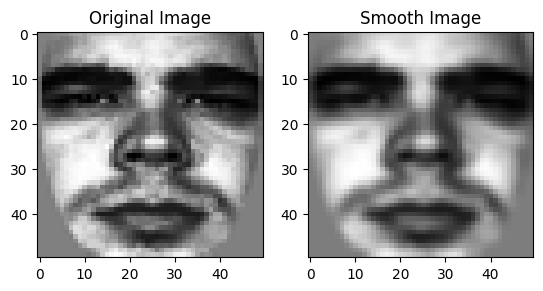

In [70]:
plt.subplot(1, 2, 1)
plt.imshow(gallery_images[0], cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(Smooth_gallery_images[0], cmap="gray")
plt.title("Smooth Image")

plt.show()

In [71]:
binarized_gallery_images = sauvola_binarization(Smooth_gallery_images)
binarized_probe_images = sauvola_binarization(Smooth_probe_images)

In [72]:
score_matrix_B_NCC = create_score_matrix_NCC(binarized_probe_images, binarized_gallery_images)
score_matrix_B_MSE = create_score_matrix_MSE(binarized_probe_images, binarized_gallery_images)
score_matrix_B_ham = create_score_matrix_ham(binarized_probe_images, binarized_gallery_images)
score_matrix_B_cosine = create_score_matrix_cosine(binarized_probe_images, binarized_gallery_images)
score_matrix_B_euclidean = create_score_matrix_euclidean(binarized_probe_images, binarized_gallery_images)

In [73]:
score_mat_df = pd.DataFrame(score_matrix_B_NCC[0:9, 0:9])
score_mat_df

,0,1,2,3,4,5,6,7,8
0,0.699905,0.362603,0.521573,0.423321,0.376083,0.389749,0.276427,0.381741,0.278631
1,0.449015,0.837993,0.333322,0.406578,0.271944,0.498049,0.434270,0.413651,0.413833
2,0.509873,0.359659,0.786725,0.442885,0.381625,0.413318,0.304118,0.354077,0.375751
3,0.486435,0.300077,0.470198,0.745768,0.447084,0.457021,0.287083,0.505973,0.437003
4,0.398194,0.244260,0.424222,0.505478,0.825293,0.368594,0.262892,0.504725,0.438369
5,0.454077,0.347877,0.509861,0.513355,0.482564,0.623520,0.314017,0.396330,0.386206
6,0.598445,0.399018,0.453488,0.564445,0.475148,0.462096,0.406017,0.473336,0.315948
7,0.486194,0.349621,0.341588,0.507945,0.481824,0.366895,0.287629,0.788590,0.319454
8,0.305128,0.384898,0.397915,0.456483,0.312541,0.357158,0.153974,0.345089,0.593871


In [74]:
methods = ['NCC', 'MSE', 'hamming', 'cosine similiarity', 'euclidean']
score_matrices = [score_matrix_B_NCC, score_matrix_B_MSE, score_matrix_B_ham, score_matrix_B_cosine, score_matrix_B_euclidean]

for i, method in enumerate(methods):
    genuine, imposter = separate_genuine_imposter(score_matrices[i])
    d_prime = decidability_index(genuine, imposter)
    print("Method {}: Decidability index (d'): {:.4f}".format(method, d_prime))


Method NCC: Decidability index (d'): 3.0961
Method MSE: Decidability index (d'): 3.1338
Method hamming: Decidability index (d'): 3.1338
Method cosine similiarity: Decidability index (d'): 3.1626
Method euclidean: Decidability index (d'): 1.3543


In [75]:
# Create lists of binarization methods and score matrix techniques
preprocessing_methods = [upscale_image,clahe_image,histogram_equalization,smoothen_image,upscale_and_hist,upscale_and_smoothen]
binarization_methods = [binarize_images, otsu_binarize_images, adaptive_thresholding, sauvola_binarization, apply_laplacian_filter, apply_sobel_filter_x, apply_sobel_filter_y, apply_sobel_filter_xy, apply_scharr_filter, apply_canny_edge_detection, apply_prewitt_filter, apply_harris_corner_detection, apply_fft_edge_detection]
score_matrix_techniques = [create_score_matrix_NCC, create_score_matrix_MSE, create_score_matrix_ham, create_score_matrix_cosine, create_score_matrix_euclidean]

best_d_prime = -float('inf') # Initialize to negative infinity
best_combination = None

for pre_method in preprocessing_methods:
    print("Preprocessing method:", pre_method.__name__)
    # Apply the preprocessing method to the probe and gallery images
    pre_probe_images = pre_method(probe_images)
    pre_gallery_images = pre_method(gallery_images)
    # Loop over each binarization method
    for bin_method in binarization_methods:
        print("Binarization method:", bin_method.__name__)
        # Apply the binarization method to the preprocessed probe and gallery images
        bin_probe_images = bin_method(pre_probe_images)
        bin_gallery_images = bin_method(pre_gallery_images)
        # Loop over each score matrix technique
        for score_method in score_matrix_techniques:
            print("Score matrix technique:", score_method.__name__)
            # Calculate the score matrix using the binarized images
            score_matrix = score_method(bin_probe_images, bin_gallery_images)
            # Print the output of each method for the score matrix
            print("Combination output of ", pre_method.__name__, bin_method.__name__, score_method.__name__)
            genuine, imposter = separate_genuine_imposter(score_matrix)
            d_prime = decidability_index(genuine, imposter)
            print("Decidability index (d'): {:.4f}".format(d_prime))
            print("--------------------------------------------------------------------------------------------------------")
            # Check if this combination produces the best d' so far
            if d_prime > best_d_prime:
                best_d_prime = d_prime
                best_combination = (pre_method.__name__, bin_method.__name__, score_method.__name__)

print("================================================================================================================")
print("Best combination: ", best_combination)
print("Best decidability index (d'): {:.4f}".format(best_d_prime))


Preprocessing method: upscale_image
Binarization method: binarize_images
Score matrix technique: create_score_matrix_NCC
Combination output of  upscale_image binarize_images create_score_matrix_NCC
Decidability index (d'): 2.9229
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_MSE
Combination output of  upscale_image binarize_images create_score_matrix_MSE
Decidability index (d'): 2.9220
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_ham
Combination output of  upscale_image binarize_images create_score_matrix_ham
Decidability index (d'): 2.9220
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_cosine
Combination output of  upscale_image binarize_images create_score_matrix_cosine
Decidabili

C:\Users\nveli\AppData\Local\Temp\ipykernel_11936\2668324747.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d_prime = (np.sqrt(2) * abs(genuine_mean - imposter_mean)) / np.sqrt(genuine_std**2 + imposter_std**2)


Combination output of  upscale_image apply_fft_edge_detection create_score_matrix_cosine
Decidability index (d'): 2.7105
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_euclidean
Combination output of  upscale_image apply_fft_edge_detection create_score_matrix_euclidean
Decidability index (d'): 1.4895
--------------------------------------------------------------------------------------------------------
Preprocessing method: clahe_image
Binarization method: binarize_images
Score matrix technique: create_score_matrix_NCC
Combination output of  clahe_image binarize_images create_score_matrix_NCC
Decidability index (d'): 3.0412
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_MSE
Combination output of  clahe_image binarize_images create_score_matrix_MSE
Decidability index (d'): 3.0442
-----

C:\Users\nveli\AppData\Local\Temp\ipykernel_11936\2668324747.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d_prime = (np.sqrt(2) * abs(genuine_mean - imposter_mean)) / np.sqrt(genuine_std**2 + imposter_std**2)


Combination output of  clahe_image apply_fft_edge_detection create_score_matrix_cosine
Decidability index (d'): 2.5909
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_euclidean
Combination output of  clahe_image apply_fft_edge_detection create_score_matrix_euclidean
Decidability index (d'): 1.3184
--------------------------------------------------------------------------------------------------------
Preprocessing method: histogram_equalization
Binarization method: binarize_images
Score matrix technique: create_score_matrix_NCC
Combination output of  histogram_equalization binarize_images create_score_matrix_NCC
Decidability index (d'): 2.9110
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_MSE
Combination output of  histogram_equalization binarize_images create_score_matrix_MSE
Decidabi

C:\Users\nveli\AppData\Local\Temp\ipykernel_11936\2668324747.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d_prime = (np.sqrt(2) * abs(genuine_mean - imposter_mean)) / np.sqrt(genuine_std**2 + imposter_std**2)


Combination output of  histogram_equalization apply_fft_edge_detection create_score_matrix_cosine
Decidability index (d'): 2.7162
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_euclidean
Combination output of  histogram_equalization apply_fft_edge_detection create_score_matrix_euclidean
Decidability index (d'): 1.5266
--------------------------------------------------------------------------------------------------------
Preprocessing method: smoothen_image
Binarization method: binarize_images
Score matrix technique: create_score_matrix_NCC
Combination output of  smoothen_image binarize_images create_score_matrix_NCC
Decidability index (d'): 2.8236
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_MSE
Combination output of  smoothen_image binarize_images create_score_matrix_MSE
Decidabili

C:\Users\nveli\AppData\Local\Temp\ipykernel_11936\2668324747.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d_prime = (np.sqrt(2) * abs(genuine_mean - imposter_mean)) / np.sqrt(genuine_std**2 + imposter_std**2)


Combination output of  smoothen_image apply_fft_edge_detection create_score_matrix_cosine
Decidability index (d'): 2.6622
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_euclidean
Combination output of  smoothen_image apply_fft_edge_detection create_score_matrix_euclidean
Decidability index (d'): 1.4686
--------------------------------------------------------------------------------------------------------
Best combination:  ('smoothen_image', 'sauvola_binarization', 'create_score_matrix_cosine')
Best decidability index (d'): 3.1626


In [76]:
# Create lists of binarization methods and score matrix techniques
binarization_methods = [binarize_images, otsu_binarize_images, adaptive_thresholding, sauvola_binarization, apply_laplacian_filter, apply_sobel_filter_x, apply_sobel_filter_y, apply_sobel_filter_xy, apply_scharr_filter, apply_canny_edge_detection, apply_prewitt_filter, apply_harris_corner_detection, apply_fft_edge_detection]
score_matrix_techniques = [create_score_matrix_NCC, create_score_matrix_MSE, create_score_matrix_ham, create_score_matrix_cosine, create_score_matrix_euclidean]

best_d_prime = -float('inf') # Initialize to negative infinity
best_combination = None

for bin_method in binarization_methods:
    print("Binarization method:", bin_method.__name__)
    # Apply the binarization method to the preprocessed probe and gallery images
    bin_probe_images = bin_method(probe_images)
    bin_gallery_images = bin_method(gallery_images)
    # Loop over each score matrix technique
    for score_method in score_matrix_techniques:
        print("Score matrix technique:", score_method.__name__)
        # Calculate the score matrix using the binarized images
        score_matrix = score_method(bin_probe_images, bin_gallery_images)
        # Print the output of each method for the score matrix
        print("Combination output of ", bin_method.__name__, score_method.__name__)
        genuine, imposter = separate_genuine_imposter(score_matrix)
        d_prime = decidability_index(genuine, imposter)
        print("Decidability index (d'): {:.4f}".format(d_prime))
        print("--------------------------------------------------------------------------------------------------------")
        # Check if this combination produces the best d' so far
        if d_prime > best_d_prime:
            best_d_prime = d_prime
            best_combination = (bin_method.__name__, score_method.__name__)

    print("================================================================================================================")
print("Best combination: ", best_combination)
print("Best decidability index (d'): {:.4f}".format(best_d_prime))


Binarization method: binarize_images
Score matrix technique: create_score_matrix_NCC
Combination output of  binarize_images create_score_matrix_NCC
Decidability index (d'): 2.9111
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_MSE
Combination output of  binarize_images create_score_matrix_MSE
Decidability index (d'): 2.9104
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_ham
Combination output of  binarize_images create_score_matrix_ham
Decidability index (d'): 2.9104
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_cosine
Combination output of  binarize_images create_score_matrix_cosine
Decidability index (d'): 2.9148
----------------------------------------------------------------------

C:\Users\nveli\AppData\Local\Temp\ipykernel_11936\2668324747.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d_prime = (np.sqrt(2) * abs(genuine_mean - imposter_mean)) / np.sqrt(genuine_std**2 + imposter_std**2)


Combination output of  apply_fft_edge_detection create_score_matrix_cosine
Decidability index (d'): 2.7013
--------------------------------------------------------------------------------------------------------
Score matrix technique: create_score_matrix_euclidean
Combination output of  apply_fft_edge_detection create_score_matrix_euclidean
Decidability index (d'): 1.4923
--------------------------------------------------------------------------------------------------------
Best combination:  ('sauvola_binarization', 'create_score_matrix_cosine')
Best decidability index (d'): 3.1665
